# Polynomial Regression

## Importing the libraries

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from astropy.io import ascii

## Importing the dataset

In [53]:
from Preprocessor4 import get_combined_dataset
from Preprocessor4 import get_single_dataset
training_set = get_combined_dataset("training_data/Typ1_FFT20Pkt/test", 4, 12)
X_train = training_set.iloc[:, [3,4]].values
y_train = training_set.iloc[:, [1,2]].values
test_set = get_combined_dataset("training_data/Typ2_FFT20Pkt/training", 1, 3)
X_test = test_set.iloc[:, [3,4]].values
y_test = test_set.iloc[:, [1,2]].values

## Training the Polynomial Regression model on the Training set

In [54]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X_train)
regressor = LinearRegression()
regressor.fit(X_poly, y_train)

LinearRegression()

## Predicting the Test set results

In [57]:
y_pred = regressor.predict(poly_reg.transform(X_test))
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),2), y_test.reshape(len(y_test),2)),1))

[[ 2.05e+01 -9.32e-03  1.95e+01  0.00e+00]
 [ 2.03e+01 -1.00e-02  1.95e+01  0.00e+00]
 [ 2.02e+01 -9.99e-03  1.95e+01  0.00e+00]
 ...
 [ 1.86e+01  5.44e-02  1.89e+01  0.00e+00]
 [ 1.87e+01  3.96e-02  1.89e+01  0.00e+00]
 [ 1.89e+01  2.45e-02  1.89e+01  0.00e+00]]


## Plot the Model Performance

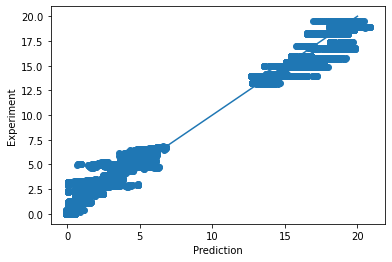

In [64]:
plt.scatter(y_pred, y_test)
plt.xlabel("Prediction")
plt.ylabel("Experiment")
plt.plot([0, 20], [0, 20])
plt.show()

## Calculate Model Performance

In [60]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.691449408012544

In [61]:
from sklearn.metrics import mean_squared_error
import math
mse = mean_squared_error(y_test, y_pred)
rmse = math.sqrt(mse)
print(rmse)

1.1302575881304924


In [62]:
from sklearn.metrics import mean_absolute_error
mape = mean_absolute_error(y_test, y_pred)*100
print(mape)

78.62027141333422


In [42]:
ascii.write([y_test, y_pred], 'poly_train2test2.dat', names=['y_test', 'y_pred'], overwrite=True)